# Introducción a _pandas_
## ¿Qué es _pandas_?
_pandas_ es una librería de Python que permite realizar operaciones con datos de una forma sencilla. Permite crear estructuras que recuerdan a las usadas en otros programas estadísticos como R, Excel o SPSS.
Para comenzar a usar esta librería, hay que importarla.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Para hacer el código más legible, se sugiere utilizar el alias _pd_ para esta librería. Una vez importada dicha librería, se pueden crear objetos basados en esta herramienta.
La estructura principal del módulo es el _DataFrame_. Dicha estructura se puede representar como una tabla, en la cual hay un conjunto de datos organizados en filas y columnas. Las columnas poseen un nombre que las identifica, y las filas se distinguen en base a un índice.
Internamente, el _DataFrame_ puede ser representado como un diccionario con claves de tipo _string_, que serían los nombres y valores de tipo _pd.Series_, que serían los arrays que contienen los datos.
Existen diversas formas de crear un objeto _DataFrame_:
- A partir de un objeto de datos de _Python_, como una lista, un diccionario o un array de _numpy_.
- A partir de un fichero, con las funciones correspondientes.
- A partir de otros objetos de _pandas_.
Empezaremos con la creación a partir de otros objetos de _Python_:

In [7]:
datos = pd.DataFrame([[1,2],[3,4]])
print(datos)

   0  1
0  1  2
1  3  4


Como se puede ver, se ha creado una matriz de datos con los valores que le hemos especificado. Cada valor va identificado de forma unívoca a partir de los nombres de sus columnas y su índice de fila. Cabe destacar que como no se ha indicado ningún tipo de información para los nombres o los índices, estos se han generado automáticamente.
En el siguiente ejemplo se muestra como crear un dato incluyendo los nombres:


In [8]:
datos = pd.DataFrame([[1,2],[3,4], [5,6]], columns=['col1', 'col2'])
print(datos)

   col1  col2
0     1     2
1     3     4
2     5     6


En este caso sí que se han especificado nombres, por lo que estos se muestran al imprimir el _DataFrame_.
Hay dos formas de acceder a los datos en _pandas_, por columna o por índice. Lo más normal es acceder por columna, por lo que a la hora de usar la librería, la prioridad se resolverá la columna y luego el índice. Esto se detallará más adelante, cuando establezcamos el índice de forma manual.
Vamos a probar a manejar los datos del _DataFrame_:

In [9]:
print(list(datos))
print(len(datos))

['col1', 'col2']
3


Al llamar list(datos), se obtiene una lista con los nombres de las columnas del _DataFrame_. Al llamar a len(datos) se obtiene el número de filas. Como se ha comentado anteriormente, se puede extraer una sección de los datos del _DataFrame_ utilizando el operador [ ] y el nombre de la columna.

In [10]:
print(datos['col1'])
print('\n')
print(datos[0])

0    1
1    3
2    5
Name: col1, dtype: int64




KeyError: 0

En este caso, se muestra el índice, el nombre y los valores y el tipo de objeto sobre el que se está trabajando. Por otro lado, al intentar utilizar este operador con el valor del índice da error. Entonces, ¿cómo podría extraer todos los valores para un índice? Para ello, existe el miembro _loc_ (_location_).

In [11]:
datos.loc[0]

col1    1
col2    2
Name: 0, dtype: int64

En este caso, se muestran los dos valores de las columnas.
Aunque en la inmensa mayoría de los casos, usar el operador [ ] no conlleva a ninguna ambigüedad, en ocasiones sí lo hace. Para especificar que quieres trabajar con el nombre de la columna, se usa el miembro _loc_ (nótese que no lleva i).
El siguiente paso es ver qué valores estadísticos permite _pandas_ calcular. Los más comunes se muestran a continuación

In [12]:
print(datos.mean(), end='\n\n')
print(datos.std(), end='\n\n')

print(datos.count(), end='\n\n')
print(datos.max(), end='\n\n')
print(datos.min(), end='\n\n')

col1    3.0
col2    4.0
dtype: float64

col1    2.0
col2    2.0
dtype: float64

col1    3
col2    3
dtype: int64

col1    5
col2    6
dtype: int64

col1    1
col2    2
dtype: int64



Lo siguiente que veremos es el tratamiento de ficheros. _pandas_ es compatible con diversos tipos de ficheros y fuentes de datos variadas. Los más comunes en el mundo de la 100sia son los ficheros _csv_ (_comma separated values_) y los ficheros _xlsx_ (el archiconocido _excel_). Para ello, _pandas_ ofrece las funciones to_csv y to_excel.
Ahora, vamos a leer un fichero _csv_ para obtener datos interesantes de verdad. 

In [13]:
datos = pd.read_csv('datos.csv')
datos.head()

,TIMESTAMP,RECORD,Batt_Volt_Min,PTemp,FTPRes_Campo,FTPRes_Inst
0,2019-05-02 10:20:00,7765,13.63,25.22,-1,-1
1,2019-05-02 10:30:00,7766,13.57,24.54,-1,-1
2,2019-05-02 10:40:00,7767,14.57,24.75,-2,-2
3,2019-05-02 10:50:00,7768,14.56,24.87,-2,-2
4,2019-05-02 11:00:00,7769,14.47,24.89,-2,-2


Se puede ver que, en este caso, el fichero es un fichero que tiene seis columnas: fecha, número de medida, voltaje de la batería, temperatura y dos indicadores de error (en los que no nos centraremos). Se puede ver que _pandas_ ha creado un índice para cada medida, pero se puede ver que hay otras columnas que podríamos utilizar como índice. Para establecer el índice, se usará el método set_index

In [14]:
datos = datos.set_index('TIMESTAMP')
datos.head()

,RECORD,Batt_Volt_Min,PTemp,FTPRes_Campo,FTPRes_Inst
TIMESTAMP,,,,,
2019-05-02 10:20:00,7765,13.63,25.22,-1,-1
2019-05-02 10:30:00,7766,13.57,24.54,-1,-1
2019-05-02 10:40:00,7767,14.57,24.75,-2,-2
2019-05-02 10:50:00,7768,14.56,24.87,-2,-2
2019-05-02 11:00:00,7769,14.47,24.89,-2,-2


Se puede ver que ahora sí que se considera como índice la fecha. Sin embargo, se puede ver que si se comprueba el tipo del índice, este será una cadena.

In [15]:
type(datos.index[0])

str

Para solucionar esto, habrá que indicar cómo se tiene que extraer la información de la fecha. Se puede usar el método to_datetime. Éste método admite una cadena, que será la que se quiere analizar y un patrón, que permite ubicar cada parámetro de la fecha dentro de la cadena. Cada letra se asocia con un dato de esta, y esto se puede consultar más extensamente en la página de documentación. Finalmente, se reasigna el índice por el analizado:

In [16]:
datos.index = pd.to_datetime(datos.index, format='%Y-%m-%d %H:%M:%S')
type(datos.index[0])

pandas._libs.tslibs.timestamps.Timestamp

Existen más funciones para analizar fechas, tanto dentro de pandas como en Python estándar. Sin embargo, esto se puede hacer también de golpe a la hora de cargar el fichero. Para ello, se han de utilizar algunos parámetros más de la función read_csv. Esto se muestra a continuación.

In [17]:
datos = pd.read_csv('datos.csv', parse_dates=True, 
                    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'),
                   index_col='TIMESTAMP')
datos.head()

,RECORD,Batt_Volt_Min,PTemp,FTPRes_Campo,FTPRes_Inst
TIMESTAMP,,,,,
2019-05-02 10:20:00,7765,13.63,25.22,-1,-1
2019-05-02 10:30:00,7766,13.57,24.54,-1,-1
2019-05-02 10:40:00,7767,14.57,24.75,-2,-2
2019-05-02 10:50:00,7768,14.56,24.87,-2,-2
2019-05-02 11:00:00,7769,14.47,24.89,-2,-2


A partir de este DataFrame, se pueden extraer datos utilizando información horaria. Esto se puede hacer tan sencillo como se muestra a continuación.

In [18]:
datos['2019-05-03']

,RECORD,Batt_Volt_Min,PTemp,FTPRes_Campo,FTPRes_Inst
TIMESTAMP,,,,,
2019-05-03 00:00:00,7847,12.58,11.61,-2,-2
2019-05-03 00:10:00,7848,12.58,11.49,-1,-1
2019-05-03 00:20:00,7849,12.57,11.49,-1,-1
2019-05-03 00:30:00,7850,12.57,11.59,-1,-1
2019-05-03 00:40:00,7851,12.56,11.59,-2,-2
2019-05-03 00:50:00,7852,12.56,11.61,-2,-2
2019-05-03 01:00:00,7853,12.55,11.61,-2,-2
2019-05-03 01:10:00,7854,12.53,11.49,-1,-1
2019-05-03 01:20:00,7855,12.55,11.45,-1,-1


Con esto se tienen todos los datos de ese día. También se puede utilizar el operador : para indicar un rango de fechas.

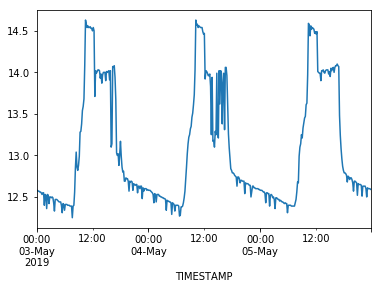

In [19]:
datos['Batt_Volt_Min']['2019-05-03':'2019-05-05'].plot()

Cabe destacar que en la gráfica se incluye el 6 de mayo porque el último valor tiene fecha a las 23:50.
También se pueden sacar valores horarios, pero para ello, se ha de usar el método loc, ya que de otra forma se muestra un error al no saber pandas cómo interpretar esa operación.

In [20]:
datos['2019-05-03 05:00:00']

KeyError: '2019-05-03 05:00:00'

In [43]:
datos.loc['2019-05-03 05:00:00']

RECORD           7877.00
Batt_Volt_Min      12.44
PTemp               9.86
FTPRes_Campo       -2.00
FTPRes_Inst        -2.00
Name: 2019-05-03 05:00:00, dtype: float64

En el caso de que se quiera reducir el número de datos disponibles a otros más manejables, bien porque se han tomado muchos datos, bien porque se quieran obtener medias diarias y otros resúmenes, se puede utilizar la función resample.

In [44]:
datos.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

Con eso, los datos han sido agrupados por día, pero no se obtiene ningún valor. Esto es porque no se le ha indicado cómo debe agrupar los datos. Para ello, se utilizan las funciones de resumen, como mean, min, max...

In [45]:
datos.resample('D').mean()

,RECORD,Batt_Volt_Min,PTemp,FTPRes_Campo,FTPRes_Inst
TIMESTAMP,,,,,
2019-05-02,7805.5,13.442561,21.344878,-1.500000,-1.500000
2019-05-03,7918.5,13.058333,17.675000,-1.520833,-1.520833
2019-05-04,8062.5,13.039375,18.081597,-1.520833,-1.520833
2019-05-05,8206.5,13.091944,18.160903,-1.520833,-1.520833
2019-05-06,8350.5,12.956389,18.951736,-1.520833,-1.520833
2019-05-07,8494.5,13.027292,22.339097,-1.520833,-1.520833
2019-05-08,8638.5,13.070764,24.084583,-1.305556,-1.305556
2019-05-09,8782.5,12.927708,25.457014,-0.604167,-0.597222
2019-05-10,8926.5,13.018333,25.197083,-1.520833,-1.520833


Pero resample sólo se utiliza cuando se trata de fechas. Dado que el índice lo elige el usuario, se puede poner otro índice, como una etiqueta que identifique un sensor. Entonces, tendríamos varias columnas de datos que nos permitirían identificar las medidas. pandas acepta este tipo de datos, utilizando un vector de columnas en el método set_index.

In [49]:
df_multi = pd.read_csv('multiindice.csv', index_col=['tratamiento', 'localizacion'])
df_multi

temp  humedad
tratamiento localizacion               
t1          arriba          22       55
            arriba          21       54
            abajo           16       54
            abajo           15       57
            fuera           10       46
            fuera            9       45
t2          arriba          21       57
            arriba          23       55
            abajo           17       57
            abajo           16       54
            fuera           11       44
            fuera           10       45

Usando groupby se pueden realizar los resumenes de una forma muy parecida a lo mostrado anteriormente.

In [50]:
df_multi.groupby(by='tratamiento').mean()

,temp,humedad
tratamiento,,
t1,15.500000,51.833333
t2,16.333333,52.000000


In [51]:
df_multi.groupby(by='localizacion').mean()

,temp,humedad
localizacion,,
abajo,16.00,55.50
arriba,21.75,55.25
fuera,10.00,45.00


O incluso, agrupar por varios índices.

In [52]:
df_multi.groupby(by=['localizacion','tratamiento']).mean()

temp  humedad
localizacion tratamiento               
abajo        t1           15.5     55.5
             t2           16.5     55.5
arriba       t1           21.5     54.5
             t2           22.0     56.0
fuera        t1            9.5     45.5
             t2           10.5     44.5

Como se puede ver, se pueden realizar agrupaciones de forma sencilla, pero hay que tener especial atención a la hora de diseñar las tablas que almacenan los datos.
Por último, se Verá cómo se pueden filtrar valores. En algunos casos puede ser interesante buscar valores concretos, que superen unos umbrales o cumplan funciones matemáticas.
Para esto, se pueden utilizar los operadores de comparación de Python. En el siguiente ejemplo se buscan las horas del día a las cuales la batería del medidor del DataFrame datos es menor que 12.5 voltios, de forma que sepa si se descarga o no.

In [61]:
busqueda = datos['Batt_Volt_Min'] < 12.5
busqueda.head()

TIMESTAMP
2019-05-02 10:20:00    False
2019-05-02 10:30:00    False
2019-05-02 10:40:00    False
2019-05-02 10:50:00    False
2019-05-02 11:00:00    False
Name: Batt_Volt_Min, dtype: bool

Se puede observar que el resultado es un array de valores booleanos, que indica si se cumple la función que se le ha indicado en la comparación. Si encontramos dentro de este array un valor True, implica que la condición se cumple, es decir, que el valor de la batería es menor que 12.5 voltios. Utilizando este vector, también se puede extraer una sección del DataFrame inicial, incluyendo únicamente los valores en los que hay un True.

In [62]:
seccion = datos[busqueda]
seccion.head()

,RECORD,Batt_Volt_Min,PTemp,FTPRes_Campo,FTPRes_Inst
TIMESTAMP,,,,,
2019-05-03 01:40:00,7857,12.40,11.22,-2,-2
2019-05-03 02:10:00,7860,12.36,10.95,-1,-1
2019-05-03 02:40:00,7863,12.42,10.58,-2,-2
2019-05-03 03:10:00,7866,12.49,10.29,-1,-1
2019-05-03 03:30:00,7868,12.49,10.09,-1,-1


A partir de ahí se puede extraer información útil, como saber cuanto tiempo está la batería descargada en porcentaje (usando la función sum, que los True cuentan como 1), mandar una alarma a través de un correo electrónico o despreciar esos valores.

In [63]:
busqueda.sum()/busqueda.count()

0.1828832406671962

Con el comando anterior, se puede ver que el 18% de las muestras del fichero están en condiciones de descarga de la batería.